# Pycoffee (3/April/2024)
<font color='gray'>_Jorge Lillo-Box_ </font>

## How to elegantly arrange your plots

### Part 1: **rcParams**

Are you tired of modifying your Python figures to properly visualize them in your A&A (or other journal) articles? 

Here I present you the definitive solution to forget about this and focus on what it really matters: **making your plot look beautiful!**

**rcParams** is the `matplotlib` module that controls the default properties of yout plots. 

By default, plots look this awful:

In [1]:
%matplotlib inline

Text(0.5, 1.0, 'This is a title')

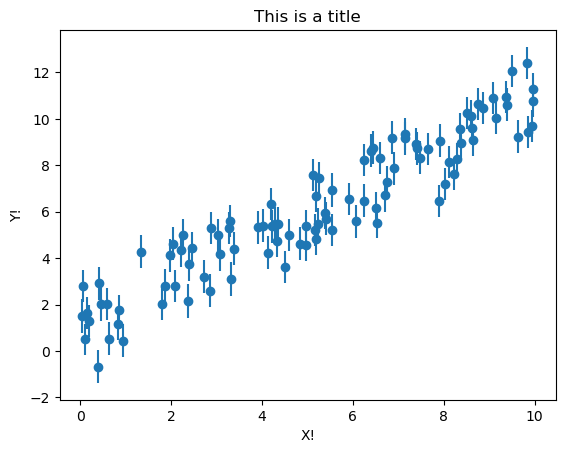

In [2]:
import numpy as np
x  = np.random.uniform(0,10,100)
y  = x + np.random.normal(1,1,100)
ey = 0.5+  np.random.normal(0.2,0.01,100)
plt.errorbar(x,y,ey,fmt='o')
plt.xlabel('X!')
plt.ylabel('Y!')
plt.title('This is a title')

Font style and size, axis thickness, etc. look so simple and basic. Plus, when moving this to an A&A article, the look is terrible.

One may want to customize this somehow, especially when preparing paper-ready figures. The solution is creating your default rcParams module and putting it in your PYTHONPATH. This is an example of how it may look like:

In [3]:
import matplotlib as mpl

# -->> Default fonts - only used if usetex = False. The fontsize remains important though.
mpl.rc('font',**{'family':'sans-serif', 'serif':['Computer Modern Serif'], 
             'sans-serif':['Helvetica'], 'size':16, 
             'weight':500, 'variant':'normal'}) 

# -->> Axis properties (you can set many more things in rcParams, like the default label weight, etc ...)
mpl.rc('axes',**{'labelweight':'normal', 'linewidth':1})
mpl.rc('ytick',**{'major.pad':12, 'color':'k'})
mpl.rc('xtick',**{'major.pad':8,})
mpl.rc('contour', **{'negative_linestyle':'solid'}) # dashed | solid

# -->> LaTeX: The default matplotlib LaTeX - only matters if usetex=False.
mpl.rc('mathtext',**{'default':'regular','fontset':'cm', 
                 'bf':'monospace:bold'})
# This is where the magic happens !
mpl.rc('text', **{'usetex':False}) 
# And this is how one can load exotic packages to fullfill one's dreams !
#mpl.rc('text.latex',preamble=r'\usepackage{cmbright},\usepackage{relsize},\usepackage{upgreek}, \usepackage{amsmath}')

Let's make the plot again:

Text(0.5, 1.0, 'This is a title')

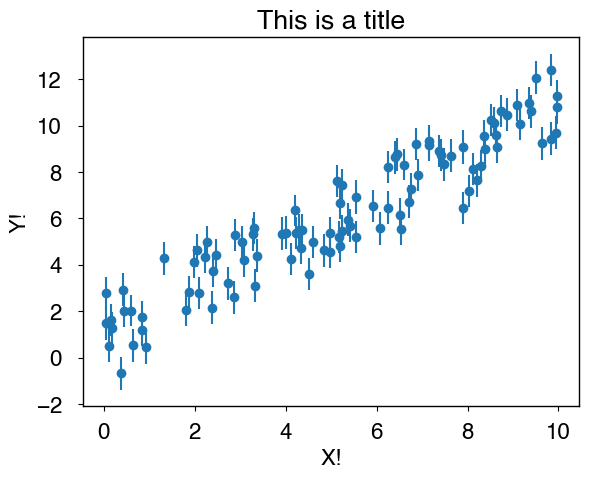

In [4]:
plt.errorbar(x,y,ey,fmt='o')
plt.xlabel('X!')
plt.ylabel('Y!')
plt.title('This is a title')

You can check out all the possibilities with **rcParams** in [this link](https://matplotlib.org/stable/users/explain/customizing.html#)

In real life, this is how the default settings show up in the paper:

![alt text](default_in_paper.png)

...and this is how it shows up when taking care of the font size:

![alt text](better_in_paper.png)

### Part 2: **the size of your figures**

We too often see papers with ilegible fontsizes, too small or simple that does not fit the journal page. There is a simple way of solving this and it only involves setting two thnigs when preparing your plots:
* Fontsize: use fontsize 16 in your rcParams file
* Figure size:
  - For one-column plots (half of the page), set figsize to: `plt.figure(1, figsize=(6.93,Y))`
  - For two-column plots (full page), set figsize to: `plt.figure(1, figsize=(14.17,Y))`

Text(0.5, 1.0, 'This is a title')

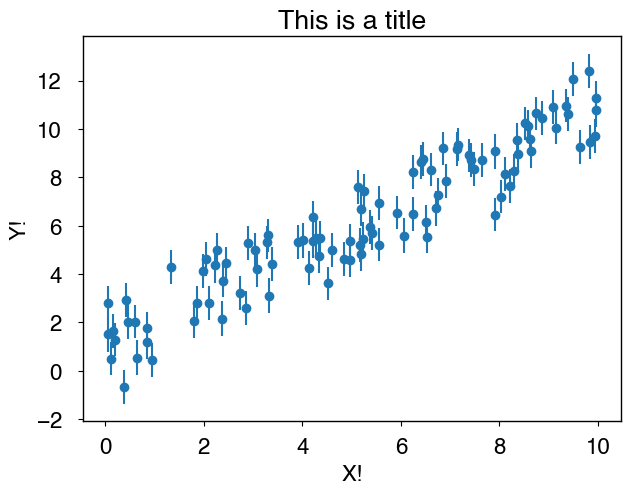

In [5]:
# One-column figure
plt.figure(1, figsize=(6.93,5))
plt.errorbar(x,y,ey,fmt='o')
plt.xlabel('X!')
plt.ylabel('Y!')
plt.title('This is a title')

Text(0.5, 1.0, 'This is a title')

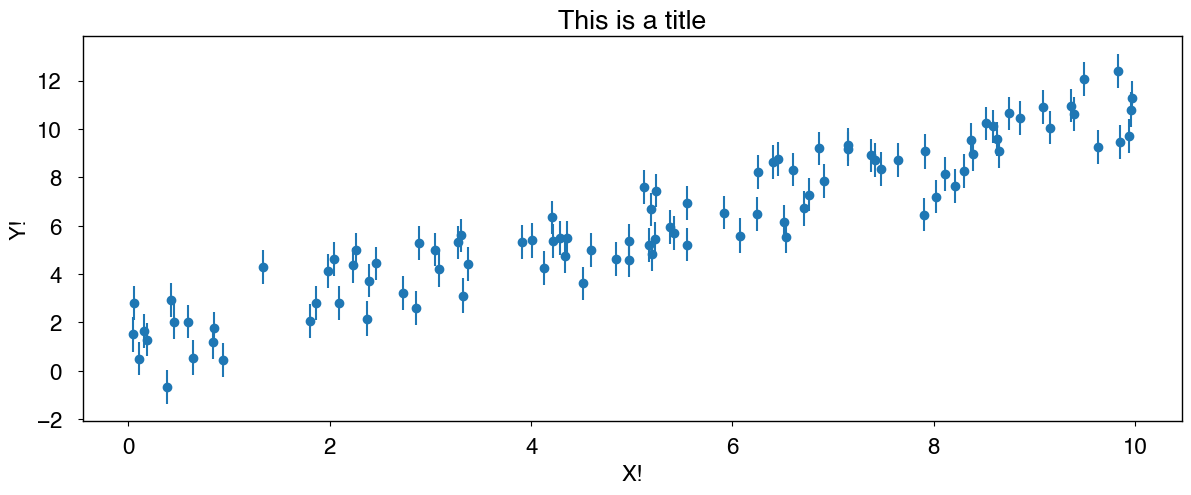

In [6]:
# Two-column figure
plt.figure(1, figsize=(14.17,5))
plt.errorbar(x,y,ey,fmt='o')
plt.xlabel('X!')
plt.ylabel('Y!')
plt.title('This is a title')

### Part 3: **Arranging your plots with _gridspec_**

#### **Preamble**

Sometimes you want to create simple plots and sometimes you need to create somehow complicated plots. In both cases, the best way to control all possibilities is using the matplotlib module `gridspec`.

The following lines are partly from a presentation from Frederic Vogt at ESO.

**This is the final goal we want to achive**

![alt text](gridspec_demo.png)

**And this is the concept of the gridspec module:**

![alt text](gridspec_concept.png)

**Now let's get into the plotting**

Import the necessary python packages

In [7]:
import numpy as np                       # For creating some fake data
import matplotlib.pyplot as plt          # Gives access to basic plotting functions
import matplotlib.gridspec as gridspec   # GRIDSPEC !
from matplotlib.colorbar import Colorbar # For dealing with Colorbars the proper way - TBD in a separate PyCoffee ?
import jlillo_pypref                     # Plotting preferences
%matplotlib inline

#### **(A) A simple example: Model+Residuals**

In [8]:
# Underlying model definition
def umodel(x):
    return x+1

In [9]:
# Fake dataset
x  = np.random.uniform(0,10,100)           # X 
y  = umodel(x) + np.random.normal(0,1,100) # Adding white noise to the data
ey = 0.5+  np.random.normal(0.2,0.01,100)  # Uncertainties!

Text(0, 0.5, 'O-C')

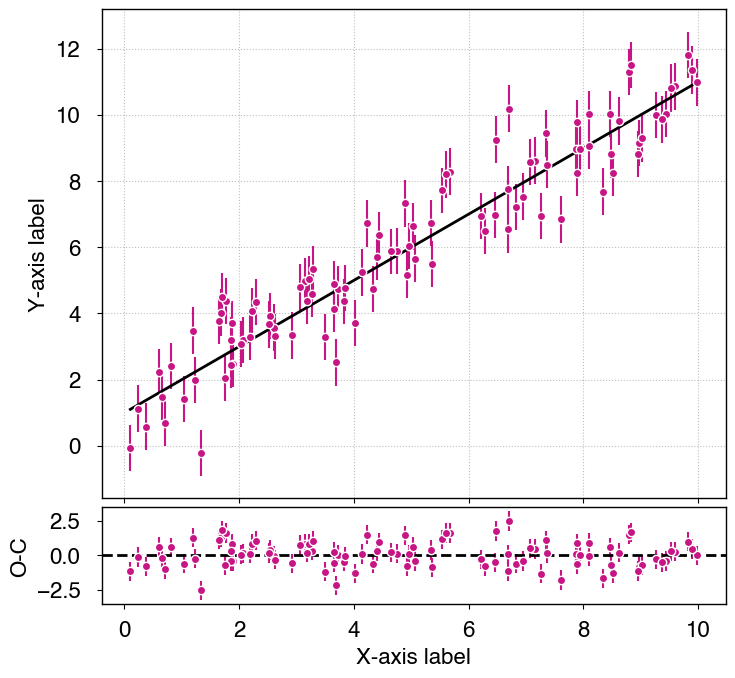

In [10]:
# First, create the figure
plt.close(1)
fig = plt.figure(1, figsize=(6.93,7))

# Now, create the gridspec structure, as required
gs = gridspec.GridSpec(2,1, height_ratios=[1,0.2], width_ratios=[1])

# Also make sure the margins and spacing are apropriate
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

# Use the gridspec magic to place it
# --------------------------------------------------------
ax0 = plt.subplot(gs[0,0]) # place it where it should be.
# --------------------------------------------------------

# Data
plt.errorbar(x,y,ey,fmt='o',c='mediumvioletred',markeredgecolor='w')
# Model
xmodel = np.linspace(np.min(x),np.max(x),1000)
ymodel = umodel(xmodel)
plt.plot(xmodel,ymodel,c='k',lw=2)

# Setting the axis labels
ax0.set_ylabel('Y-axis label')
ax0.set_xlabel('')
ax0.get_xaxis().set_ticklabels([])
ax0.grid(ls=':',c='gray',alpha=0.5)

# --------------------------------------------------------
ax1 = plt.subplot(gs[1,0]) # place it where it should be.
# --------------------------------------------------------

# Residuals
residuals = y - umodel(x)
plt.errorbar(x,residuals,ey,fmt='o',c='mediumvioletred',markeredgecolor='w')
ax1.axhline(0,ls='--',c='k',lw=2)

# Setting the axis labels
ax1.set_xlabel('X-axis label')
ax1.set_ylabel('O-C')




**Excercise 1:** Let's add a residuals histogram to the bottom panel to make it look like this:

![alt text](best_figure_simple.png)

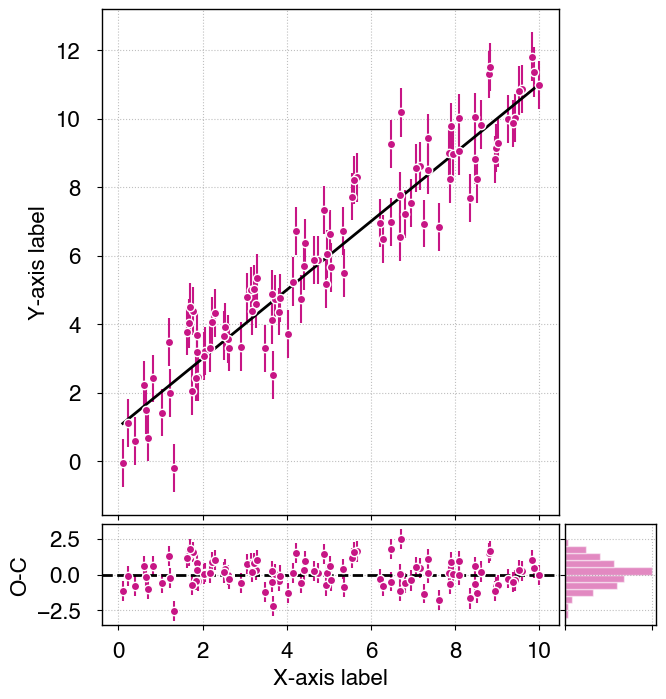

In [11]:
# First, create the figure
plt.close(1)
fig = plt.figure(1, figsize=(6.93,7))

# Now, create the gridspec structure, as required
gs = gridspec.GridSpec(2,2, height_ratios=[1,0.2], width_ratios=[1,0.2])

# Also make sure the margins and spacing are apropriate
gs.update(left=0.15, right=0.95, bottom=0.10, top=0.98, wspace=0.02, hspace=0.03)

#****************************************************************************
# This is the same as before....
#****************************************************************************
# Use the gridspec magic to place it
# --------------------------------------------------------
ax0 = plt.subplot(gs[0,0]) # MAIN PLOT
# --------------------------------------------------------

# Data
plt.errorbar(x,y,ey,fmt='o',c='mediumvioletred',markeredgecolor='w')
# Model
xmodel = np.linspace(np.min(x),np.max(x),1000)
ymodel = umodel(xmodel)
plt.plot(xmodel,ymodel,c='k',lw=2)

# Setting the axis labels
ax0.set_ylabel('Y-axis label')
ax0.set_xlabel('')
ax0.get_xaxis().set_ticklabels([])
ax0.grid(ls=':',c='gray',alpha=0.5)

# --------------------------------------------------------
ax1 = plt.subplot(gs[1,0]) # RESIDUALS
# --------------------------------------------------------

# Residuals
residuals = y - umodel(x)
plt.errorbar(x,residuals,ey,fmt='o',c='mediumvioletred',markeredgecolor='w')
ax1.axhline(0,ls='--',c='k',lw=2)

# Setting the axis labels
ax1.set_xlabel('X-axis label')
ax1.set_ylabel('O-C')
ax1.grid(ls=':',c='gray',alpha=0.5)

#****************************************************************************
# ... and this is the new panel:
#****************************************************************************

# --------------------------------------------------------
ax1h = plt.subplot(gs[1,1]) # Residuals histogram.
# --------------------------------------------------------

# Residuals
bins = np.arange(-3,3,0.5)
ax1h.hist(residuals, bins=bins, orientation='horizontal', color='mediumvioletred', edgecolor='w',alpha=0.5)
ax1h.set_ylim(ax1.get_ylim())
ax1h.get_yaxis().set_ticklabels([])
ax1h.get_xaxis().set_ticklabels([])
ax1h.grid(ls=':',c='gray',alpha=0.5)



And this is how it will look in your paper:

![alt text](best_figure.png)

#### **(B) A more complicated example**

Creating the fake data to plot

In [12]:
# Let's first create some fake data
x = np.random.randn(1000)
y = np.random.randn(1000)
z = np.sqrt(x**2+y**2)

# `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
# with random floats sampled from a univariate "normal" (Gaussian)
# distribution of mean 0 and variance 1.

1.- Create the figure panel

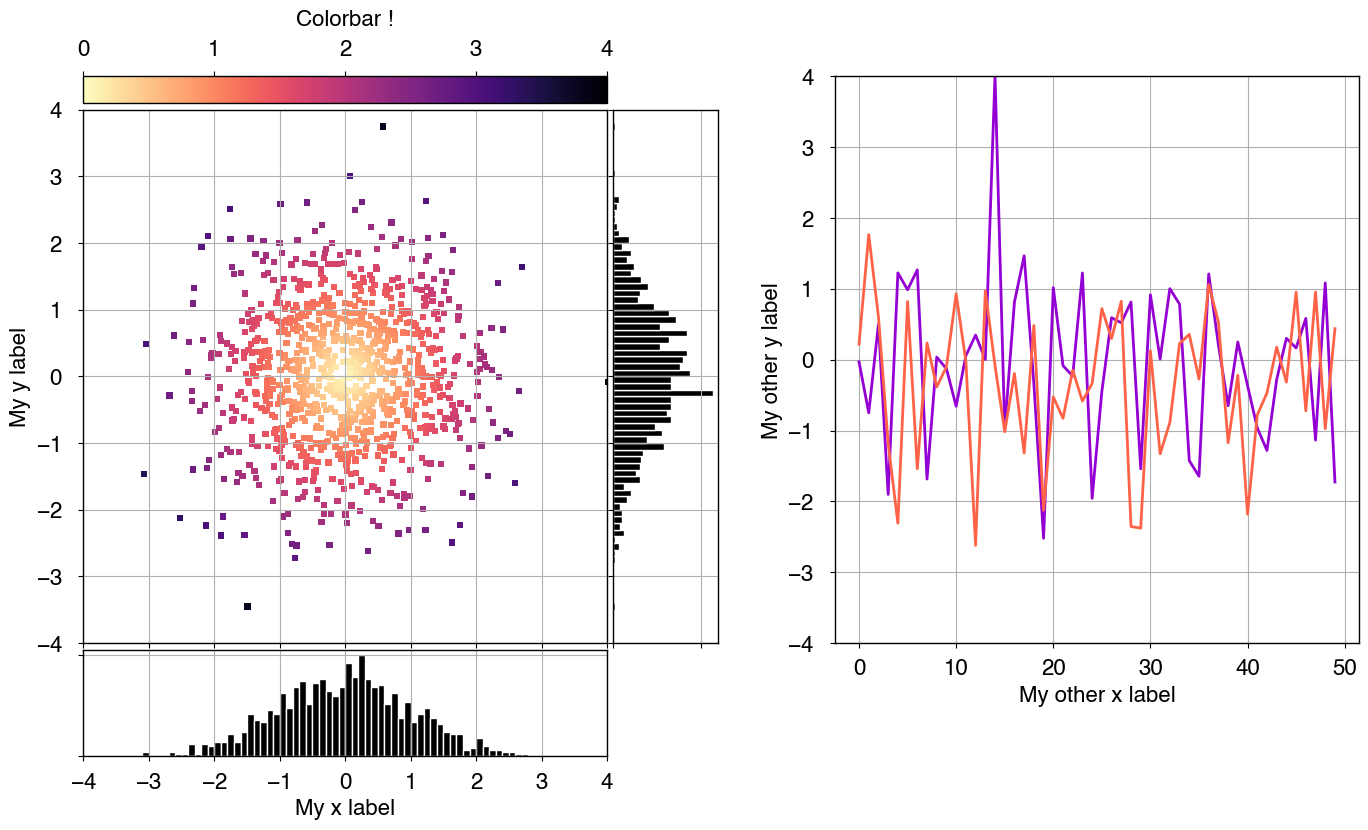

In [13]:
# First, create the figure
plt.close(1)
fig = plt.figure(1, figsize=(14.17,8))

# =============================================================

# Now, create the gridspec structure, as required
gs = gridspec.GridSpec(3,4, height_ratios=[0.05,1,0.2], width_ratios=[1,0.2,0.2,1])

# 3 rows, 4 columns, each with the required size ratios. 
# Also make sure the margins and spacing are apropriate

gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

# Note: I set the margins to make it look good on my screen ...
# BUT: this is irrelevant for the saved image, if using bbox_inches='tight'in savefig !

# Note: Here, I use a little trick. I only have three vertical layers of plots : 
# a scatter plot, a histogram, and a line plot. So, in principle, I could use a 3x3 structure. 
# However, I want to have the histogram 'closer' from the scatter plot than the line plot.
# So, I insert a 4th layer between the histogram and line plot, 
# keep it empty, and use its thickness (the 0.2 above) to adjust the space as required.

# =============================================================

# First, the scatter plot
# Use the gridspec magic to place it
# --------------------------------------------------------
ax1 = plt.subplot(gs[1,0]) # place it where it should be.
# --------------------------------------------------------

# The plot itself
plt1 = ax1.scatter(x, y, c = z, 
                   marker = 's', s=20, edgecolor = 'none',alpha =1,
                   cmap = 'magma_r', vmin =0 , vmax = 4)

# Define the limits, labels, ticks as required
ax1.grid(True)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_xlabel(r' ') # Force this empty !
ax1.set_xticks(np.linspace(-4,4,9)) # Force this to what I want - for consistency with histogram below !
ax1.set_xticklabels([]) # Force this empty !
ax1.set_ylabel(r'My y label')

# and let us not forget the colorbar  above !
# --------------------------------------------------------
cbax = plt.subplot(gs[0,0]) # Place it where it should be.
# --------------------------------------------------------

cb = Colorbar(ax = cbax, mappable = plt1, orientation = 'horizontal', ticklocation = 'top')
cb.set_label(r'Colorbar !', labelpad=10)

# =============================================================

# NOTE: I guess that a kernel density plot on top of the histogram would be better from a scientific standpoint. 
# But this is only meant as an illustration of a side-plot, so who cares ?

# And now the histogram
# Use the gridspec magic to place it
# --------------------------------------------------------
ax1v = plt.subplot(gs[1,1])
# --------------------------------------------------------

# Plot the data
bins = np.arange(-4,4,0.1)
ax1v.hist(y,bins=bins, orientation='horizontal', color='k', edgecolor='w')

# Define the limits, labels, ticks as required
ax1v.set_yticks(np.linspace(-4,4,9)) # Ensures we have the same ticks as the scatter plot !
ax1v.set_xticklabels([])
ax1v.set_yticklabels([])
ax1v.set_ylim([-4,4])
ax1v.grid(True)

# =============================================================

# And now another histogram
# Use the gridspec magic to place it
# --------------------------------------------------------
ax1h = plt.subplot(gs[2,0])
# --------------------------------------------------------


# Plot the data
bins = np.arange(-4,4,0.1)
ax1h.hist(x, bins=bins, orientation='vertical', color='k', edgecolor='w')

# Define the limits, labels, ticks as required
ax1h.set_xticks(np.linspace(-4,4,9)) # Ensures we have the same ticks as the scatter plot !
ax1h.set_yticklabels([])
ax1h.set_xlim([-4,4])
ax1h.set_xlabel(r'My x label')
ax1h.grid(True)

# =============================================================

# Finally, show some 'spectra' in the right panel
# Use the gridspec magic to place it
# --------------------------------------------------------
ax2 = plt.subplot(gs[0:2,3]) # Make it span the entire height of the figure (3 rows)
# --------------------------------------------------------

# Plot the data
plt.plot(x[::20], ls = '-', color='darkviolet', lw=2)
plt.plot(y[::20], ls = '-', color ='tomato', lw=2)

# Define the limits, labels, ticks as required
ax2.set_xlabel('My other x label')
ax2.set_ylabel('My other y label')
ax2.set_ylim([-4,4])
ax2.grid(True)

